In [2]:

# datasets.set_cache_dir("/home/jovyan/.cache/huggingface/datasets")
import os
os.environ['HF_HOME'] = "/home/jovyan/.cache/huggingface/datasets/transformers"
os.environ['HF_DATASETS_CACHE'] = "/home/jovyan/.cache/huggingface/datasets/transformers"

from datasets.utils.logging import get_verbosity
from datasets import load_dataset, load_from_disk
import datasets
datasets.logging.set_verbosity_info()  # or datasets.logging.set_verbosity_debug()
# Get and print the cache directory
cache_dir = datasets.config.HF_DATASETS_CACHE
print(f"Cache directory: {cache_dir}")
# Continue with your usual operations
dataset = load_from_disk("/home/jovyan/rmt/datasets/pg19/pg19_tokenized")

def filter_by_len(sample):
    return len(sample['tokens']) > 16000

filtered = dataset['train'].filter(filter_by_len)


Cache directory: /home/jovyan/.cache/huggingface/datasets/transformers


Loading dataset from disk:   0%|          | 0/69 [00:00<?, ?it/s]

Loading cached processed dataset at /home/jovyan/rmt/datasets/pg19/pg19_tokenized/train/cache-4db26c92582d08f9.arrow


In [1]:
from datasets import load_dataset, load_from_disk
from transformers import AutoTokenizer
dataset = load_from_disk("/home/jovyan/rmt/datasets/pg19/pg19_tokenized")
def filter_by_len(sample, min_len=16000):
    return len(sample['tokens']) > min_len
filtered = dataset['train'].filter(filter_by_len)

Loading dataset from disk:   0%|          | 0/69 [00:00<?, ?it/s]

In [2]:
dataset = load_from_disk("/home/jovyan/rmt/datasets/pg19/pg19_tokenized")


Loading dataset from disk:   0%|          | 0/69 [00:00<?, ?it/s]

In [2]:
import os

In [6]:
os.environ.get('HF_HOME')

In [ ]:

adatasets.set_caching_enabled(True)
datasets.set_cache_dir("/path/to/shared/cache")

In [12]:
sample = dataset['test'][0]

In [3]:
# [len(t) for t in dataset['train']['tokens']]

In [23]:
dataset

DatasetDict({
    train: Dataset({
        features: ['short_book_title', 'publication_date', 'url', 'text', 'tokens'],
        num_rows: 28602
    })
    validation: Dataset({
        features: ['short_book_title', 'publication_date', 'url', 'text', 'tokens'],
        num_rows: 50
    })
    test: Dataset({
        features: ['short_book_title', 'publication_date', 'url', 'text', 'tokens'],
        num_rows: 100
    })
})

In [24]:
# lens = []
# for _ in range(1000, 2000):
#     lens.append(len(dataset['train'][_]['tokens']))

# lens_t = []
# for _ in range(len(dataset['validation'])):
#     lens_t.append(len(dataset['validation'][_]['tokens']))
lens_t = []
for _ in range(len(dataset['test'])):
    lens_t.append(len(dataset['test'][_]['tokens']))

In [25]:
from matplotlib import pyplot as plt

(array([75., 18.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([   3522. ,  114076.7,  224631.4,  335186.1,  445740.8,  556295.5,
         666850.2,  777404.9,  887959.6,  998514.3, 1109069. ]),
 <BarContainer object of 10 artists>)

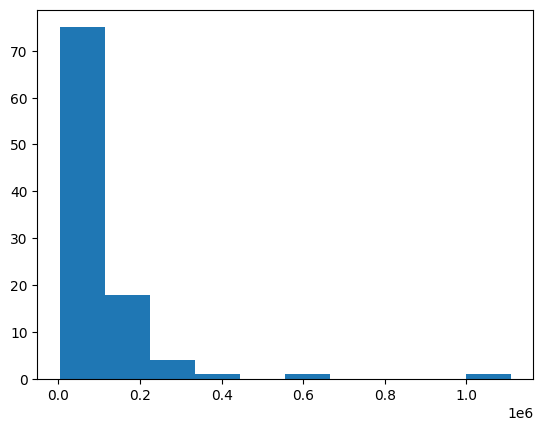

In [26]:
plt.hist(lens_t)

In [27]:
import numpy as np

In [28]:
np.min(lens_t)

3522

In [30]:
for thr in [4000, 8000, 16000]:
    print((np.array(lens_t) < thr).mean())

0.01
0.05
0.07


In [ ]:
lens

In [3]:
def filter_by_len(sample, min_len=16000):
    return len(sample['tokens']) > min_len

In [4]:
def filter_by_len(sample, min_len=16000):
    return len(sample['tokens']) > min_len
filtered = dataset['train'].filter(filter_by_len)

In [42]:
filtered

Dataset({
    features: ['short_book_title', 'publication_date', 'url', 'text', 'tokens'],
    num_rows: 25552
})

In [39]:
inds = np.linspace(0, 90, 10).astype(int).tolist()

In [40]:
dataset['test'].select(inds)

Dataset({
    features: ['short_book_title', 'publication_date', 'url', 'text', 'tokens'],
    num_rows: 10
})

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 202,
 212,
 222,
 232,
 242,
 252,
 262,
 272,
 282,
 292,
 303,
 313,
 323,
 333,
 343,
 353,
 363,
 373,
 383,
 393,
 404,
 414,
 424,
 434,
 444,
 454,
 464,
 474,
 484,
 494,
 505,
 515,
 525,
 535,
 545,
 555,
 565,
 575,
 585,
 595,
 606,
 616,
 626,
 636,
 646,
 656,
 666,
 676,
 686,
 696,
 707,
 717,
 727,
 737,
 747,
 757,
 767,
 777,
 787,
 797,
 808,
 818,
 828,
 838,
 848,
 858,
 868,
 878,
 888,
 898,
 909,
 919,
 929,
 939,
 949,
 959,
 969,
 979,
 989,
 1000]

In [32]:
filtered_train = dataset['train'].filter(filter_by_len)#, batched=True)

Filter:   0%|          | 0/28602 [00:00<?, ? examples/s]

In [ ]:
from itertools import chain
def group_texts(examples, segment_size, history_size=None):
    concatenated_examples = {k: list(chain(*examples[k])) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])

    if history_size is None:
        result = {
            k: [t[i : i + segment_size] for i in range(0, total_length, segment_size)]
            for k, t in concatenated_examples.items()
        }
    else:
        result = {
            k: [t[max({0, i - history_size}) : i + segment_size] for i in range(history_size, total_length, segment_size)]
            for k, t in concatenated_examples.items()
        }
    return result

segment_size = 1024
history_size = val_history_size = 1024

train_dataset = dataset["train"].select_columns(['tokens']).map(lambda x: group_texts(x, segment_size, history_size),
                                                batched=True, desc=f"Grouping train in chunks of {segment_size} and history {history_size}")
valid_dataset = dataset["validation"].select_columns(['tokens']).map(lambda x: group_texts(x, segment_size, val_history_size), 
                                                        batched=True, desc=f"Grouping valid in chunks of {segment_size} and history {val_history_size}")
test_dataset = dataset["test"].select_columns(['tokens']).map(lambda x: group_texts(x, segment_size, val_history_size), 
                                                        batched=True, desc=f"Grouping test in chunks of {segment_size} and history {val_history_size}")


In [ ]:

def filter_by_len(sample, min_len=16000):
    return len(sample['tokens']) > min_len
train_dataset = train_dataset.map(filter_by_len)

num_valid_examples = 100
valid_inds = np.linspace(0, range(len(valid_dataset)), num_valid_examples).astype(int)
valid_dataset = valid_dataset.select(valid_inds)

In [7]:

# dataset = load_dataset('/home/jovyan/rmt/datasets/pile/data/test.jsonl.zst')
dataset = load_from_disk('/home/jovyan/rmt/datasets/pile_smol/')
# dataset = load_dataset('EleutherAI/pile', 'test')

FileNotFoundError: Directory /home/jovyan/rmt/datasets/pile_smol/ is neither a `Dataset` directory nor a `DatasetDict` directory.

In [ ]:



model_path = "/home/jovyan/kuratov/models/Llama-3.2-1B"
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [ ]:

def tokenize(sample):
    sample['tokens'] = tokenizer.encode(sample['text'], return_tensors='pt')[0]
    return sample

new_ds = dataset.map(tokenize, batch_size=256)
new_ds.save_to_disk('pg19_tokenized')